In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

In [4]:
X ,Y = make_circles(n_samples=500,noise=0.1,factor=0.2)

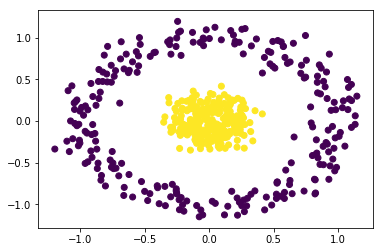

In [5]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [15]:
input_size = 2
layers = [4,3]
output = 2

In [7]:
a = np.array([[20,10],[20,20]])


In [8]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [9]:
softmax(a)

array([[9.99954602e-01, 4.53978687e-05],
       [5.00000000e-01, 5.00000000e-01]])

In [38]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_layers,output_size):
        np.random.seed(0)
        model = {}
        model['w1'] = np.random.randn(input_size,hidden_layers[0])
        model['b1'] = np.zeros((1,hidden_layers[0]))
        
        model['w2'] = np.random.randn(hidden_layers[0],hidden_layers[1])
        model['b2'] = np.zeros((1,hidden_layers[1]))
        
        model['w3'] = np.random.randn(hidden_layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #store the output for each layer for backpropagation later
        self.activation_outputs = (a1,a2,y_)
        return y_
        
        
    def backward(self,x,y,learning_rate =0.001):
        W1,W2,W3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        
        #final layer
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2  = np.dot(delta3,W3.T)*(1 - np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,w2.T)*(1-np.square(a1))
        dw1 = np.dot(x.T,axis=0)
        db1 = np.sum(delta1,axis = 0)
        
        #gradient Decent
        self.model['w1'] -= learning_rate*dw1
        self.model['w2'] -= learning_rate*dw2
        self.model['w3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_pred = self.forward(x)
        return np.argmax(y_pred,axis = 1)
    
    
        

In [39]:
def loss(y_oht,pred):
    l = -np.mean(y_oht*np.log(pred))
    return 1

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [40]:
labels = one_hot(np.array([0,0,1,2]),depth = 3)

print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [41]:
model = NeuralNetwork(input_size=2,hidden_layers = layers, output_size=2)

In [42]:
print(model.forward(X[0].reshape(1,-1)))

[[0.98232195 0.01767805]]


In [ ]:
def train(X,Y,epochs = 50):
    train_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for epoch in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)